## Task 3: Pizza Sales Analysis

In [198]:
#importing necessary tools
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set() #default style for seaborn

import warnings # to import warning
warnings.filterwarnings("ignore")

## To Import each file

In [168]:
pizzas = pd.read_csv("pizzas.csv")

pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [170]:
orders = pd.read_csv("orders.csv")

pizzas.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [172]:
order_details = pd.read_csv("order_details.csv")

order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [174]:
pizza_types = pd.read_csv("pizza_types.csv", encoding='latin1')

pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## Merging all the files

In [178]:
# merging order_details with pizza to get the price
details_prices = pd.merge(order_details, pizzas, on="pizza_id")
#merging with orders to get order date/time
full_data = pd.merge(details_prices,orders, on="order_id")
#merging with pizza_types to get pizza categories and ingredients
full_data = pd.merge(full_data, pizza_types, on="pizza_type_id")

full_data.head()


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [182]:
#to get the infomation about the data set
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   date              48620 non-null  object 
 8   time              48620 non-null  object 
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [226]:
# to convert date/time columns
full_data['data'] = pd.to_datetime(full_data['date'], dayfirst=True)
full_data['time'] = pd.to_datetime(full_data['time'], format="%H:%M:%S").dt.time
full_data["day"] = full_data["date"].dt.day_name()
full_data["month"] = full_data["date"].dt.month_name()

In [228]:
full_data.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients,data,day,month
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,Thursday,January
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,Thursday,January
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,Thursday,January
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,Thursday,January
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,Thursday,January


In [196]:
#to check if the changes made on the date column has been corrected on the data set
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   date              48620 non-null  datetime64[ns]
 8   time              48620 non-null  object        
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [200]:
#to check for null value of each coulumn
full_data.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
date                0
time                0
name                0
category            0
ingredients         0
dtype: int64

In [202]:
##to check value counts for order details
full_data["order_details_id"].value_counts()

order_details_id
1        1
32418    1
32409    1
32410    1
32411    1
        ..
16209    1
16210    1
16211    1
16212    1
48620    1
Name: count, Length: 48620, dtype: int64

In [204]:
##to check value counts for order_id
full_data["order_id"].value_counts()

order_id
18845    21
10760    21
18280    15
21158    15
17464    15
         ..
10351     1
10355     1
10357     1
10360     1
21350     1
Name: count, Length: 21350, dtype: int64

In [206]:
#to check value counts for quantity
full_data["quantity"].value_counts()

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

In [208]:
#to check the value count for pizza_id
full_data["pizza_id"].value_counts()

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

1. To get the total revenue

In [240]:
# to get create revenue column 
full_data['revenue'] = full_data['price'] * full_data['quantity']

In [242]:
full_data.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients,data,day,month,revenue
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,Thursday,January,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,Thursday,January,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,Thursday,January,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,Thursday,January,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,Thursday,January,16.00


In [254]:
#To get total revenue
Total_revenue = full_data['revenue'].sum()
Total_revenue

817860.05

In [250]:
# To get total quantity
total_quantity=full_data['quantity'].sum()
total_quantity


49574

In [256]:
#To get the total orders
Total_orders = full_data['order_id'].sum()
Total_orders

520305946

In [270]:
#to get the how many pizza type they do sell
pizza_type = full_data['pizza_type_id'].unique()
pizza_type

array(['hawaiian', 'classic_dlx', 'five_cheese', 'ital_supr', 'mexicana',
       'thai_ckn', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'green_garden', 'ital_cpcllo', 'spicy_ital', 'spin_pesto',
       'veggie_veg', 'southw_ckn', 'cali_ckn', 'pepperoni', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'calabrese', 'ital_veggie', 'mediterraneo', 'peppr_salami',
       'spinach_fet', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [274]:
num_pizza_types = full_data['pizza_type_id'].nunique()

num_pizza_types

32

In [276]:
# To get the average price pizzas
average_price = full_data['price'].mean()

average_price

16.494132044426163

# To get the peak hours of sales

In [279]:
full_data.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients,data,day,month,revenue
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,Thursday,January,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,Thursday,January,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,Thursday,January,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,Thursday,January,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,Thursday,January,16.00


In [301]:
#to change the time column to datetime type
full_data['time'] = pd.to_datetime(full_data['time'], format='%H:%M:%S', errors='coerce')


In [303]:
#to create hour column
full_data['hour'] = full_data['time'].dt.hour


In [307]:
# To get the total sale per hour
sales_per_hour = full_data['hour'].value_counts().sort_index()

sales_per_hour

hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

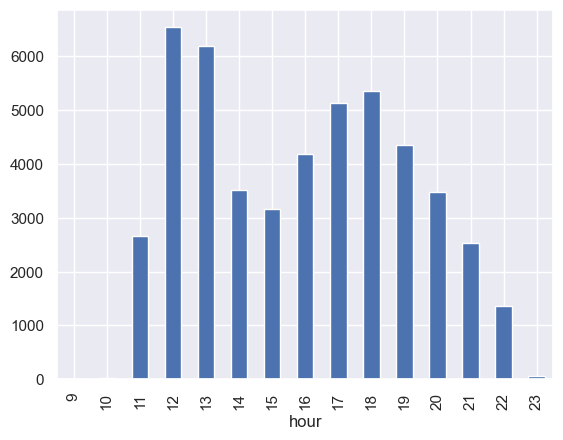

In [351]:
#to visualize the most sales hour
sales_per_hour.plot(kind ='bar')
plt.savefig("task3b_plot.png", dpi=300,bbox_inches='tight')
plt.show

In [311]:
# to get the peak hour sale
peak_hour = sales_per_hour.idxmax()
peak_hour

12

# To get the day with the most sales

In [313]:
# Group revenue with days
Sales_by_day = full_data.groupby('day')['revenue'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [315]:
Sales_by_day

day
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: revenue, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

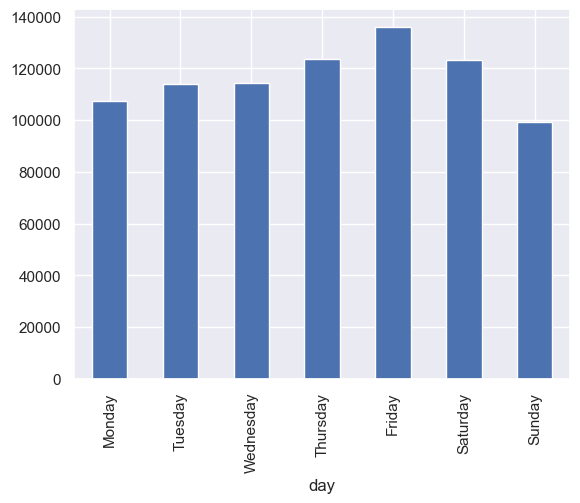

In [355]:
# to visualize the day with the most sales
Sales_by_day.plot(kind ='bar')
plt.savefig("task3b_plot.png", dpi=300,bbox_inches='tight')
plt.show

In [321]:
#to get the day with most sales
Day_with_most_sale = Sales_by_day.idxmax()

Day_with_most_sale

'Friday'

# To get the best selling pizza

In [326]:
#group pizza with quantity
pizza_sales = full_data.groupby('pizza_type_id')['quantity'].sum()

pizza_sales

pizza_type_id
bbq_ckn         2432
big_meat        1914
brie_carre       490
calabrese        937
cali_ckn        2370
ckn_alfredo      987
ckn_pesto        973
classic_dlx     2453
five_cheese     1409
four_cheese     1902
green_garden     997
hawaiian        2422
ital_cpcllo     1438
ital_supr       1884
ital_veggie      981
mediterraneo     934
mexicana        1484
napolitana      1464
pep_msh_pep     1359
pepperoni       2418
peppr_salami    1446
prsc_argla      1457
sicilian        1938
soppressata      961
southw_ckn      1917
spicy_ital      1924
spin_pesto       970
spinach_fet     1446
spinach_supr     950
thai_ckn        2371
the_greek       1420
veggie_veg      1526
Name: quantity, dtype: int64

In [335]:
# another way to group
pizza_type_id = full_data["pizza_type_id"].value_counts()

pizza_type_id

pizza_type_id
classic_dlx     2416
bbq_ckn         2372
hawaiian        2370
pepperoni       2369
thai_ckn        2315
cali_ckn        2302
sicilian        1887
spicy_ital      1887
southw_ckn      1885
four_cheese     1850
ital_supr       1849
big_meat        1811
veggie_veg      1510
mexicana        1456
napolitana      1451
spinach_fet     1432
prsc_argla      1428
peppr_salami    1422
ital_cpcllo     1414
the_greek       1406
five_cheese     1359
pep_msh_pep     1342
green_garden     987
ckn_alfredo      980
ital_veggie      975
ckn_pesto        961
spin_pesto       957
soppressata      957
spinach_supr     940
calabrese        927
mediterraneo     923
brie_carre       480
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

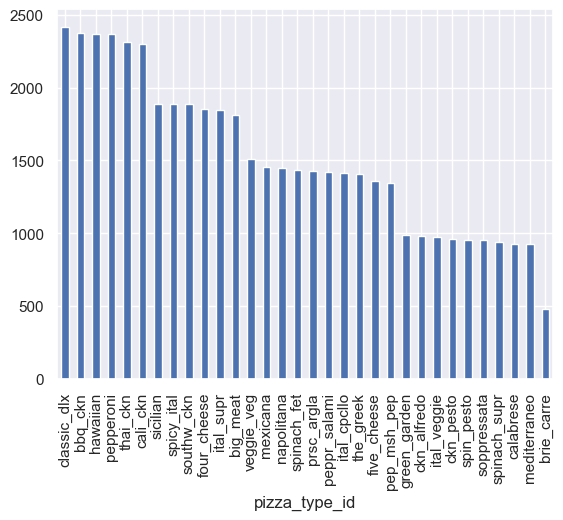

In [345]:
#to visualize with barchat the sales of pizzas
pizza_type_id.plot(kind ='bar')
plt.savefig("task3_plot.png", dpi=300,bbox_inches='tight')
plt.show

In [349]:
#To identify the best selling pizza
bestselling_pizza= pizza_sales.idxmax()

bestselling_pizza

'classic_dlx'

## To get the sales per month

In [379]:
# To group revenue for each month
Sales_by_month = full_data.groupby('month')['revenue'].sum().reset_index()

In [370]:
Sales_by_month

,month,revenue
0,April,68736.80
1,August,68278.25
2,December,64701.15
3,February,65159.60
4,January,69793.30
5,July,72557.90
6,June,68230.20
7,March,70397.10
8,May,71402.75
9,November,70395.35


In [374]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   date              48620 non-null  datetime64[ns]
 8   time              48620 non-null  datetime64[ns]
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  data              48620 non-null  datetime64[ns]
 13  day               48620 non-null  object        
 14  month             4862

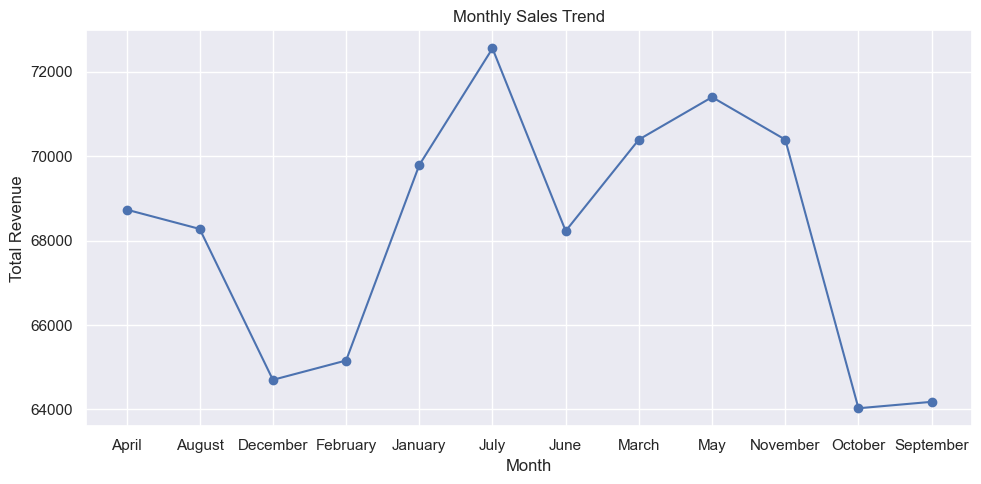

In [376]:
# To visualize the trend in sales for each month
plt.figure(figsize=(10, 5))
plt.plot(Sales_by_month['month'], Sales_by_month['revenue'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [381]:
# the trend shows that much sales is made in July and the lowest sales is in october

In [ ]:
pizza

In [397]:
poor_selling_pizza= pizza_sales.idxmin()

poor_selling_pizza

'brie_carre'

In [413]:
pizza_sales_performance = full_data.groupby('pizza_type_id')['quantity'].sum()

pizza_sales_performance

pizza_type_id
bbq_ckn         2432
big_meat        1914
brie_carre       490
calabrese        937
cali_ckn        2370
ckn_alfredo      987
ckn_pesto        973
classic_dlx     2453
five_cheese     1409
four_cheese     1902
green_garden     997
hawaiian        2422
ital_cpcllo     1438
ital_supr       1884
ital_veggie      981
mediterraneo     934
mexicana        1484
napolitana      1464
pep_msh_pep     1359
pepperoni       2418
peppr_salami    1446
prsc_argla      1457
sicilian        1938
soppressata      961
southw_ckn      1917
spicy_ital      1924
spin_pesto       970
spinach_fet     1446
spinach_supr     950
thai_ckn        2371
the_greek       1420
veggie_veg      1526
Name: quantity, dtype: int64

In [431]:
quantity = full_data["quantity"].value_counts()

quantity

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

In [437]:
underperforming = pizza_sales_performance[pizza_sales_performance["quantity"] < 1000]

underperforming

KeyError: 'quantity'